# VGG16

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### Preprocess

In [2]:
(Xtrain, Ytrain),(Xtest,Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain[:,:,:,None]/255.
Xtest = Xtest[:,:,:,None]/255.

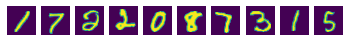

In [3]:
n = 10
for j,i in enumerate(np.random.choice(len(Xtrain),n)):
    plt.subplot(1,n,j+1)
    plt.imshow(Xtrain[i,:,:,0])
    plt.axis('off')
plt.show()

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),padding="same",activation="relu",input_shape=(224,224,3)))
model.add(tf.keras.layers.Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(256,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(256,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(256,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096,activation="relu"))
model.add(tf.keras.layers.Dense(4096,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=tf.keras.losses.sparse_categorical_crossentropy)

In [5]:
# tf.keras.utils.plot_model(model,show_shapes=True)

#### Training

Create custom training loop for low memory.

In [6]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()
batches = 16
datagen.fit(Xtrain)
num_batch = len(Xtrain)/batches
Progbar = tf.keras.utils.Progbar(num_batch)
for epoch in range(50):
    batch_count = 0
    model.save(r"C:\Users\User\Desktop\Super_AI\DL_NN\DL_VGG16\model")
    for x,y in datagen.flow(Xtrain,Ytrain,batch_size=batches):
        x = tf.image.resize(x,(224,224))
        x = tf.image.grayscale_to_rgb(x)
        history = model.fit(x,y,verbose=0)
        batch_count += 1
        Progbar.update(batch_count,values=[('loss',history.history['loss'][0])])
    if batch_count >= num_batch:
        print(epoch)
        break

INFO:tensorflow:Assets written to: C:\Users\User\Desktop\Super_AI\DL_NN\DL_VGG16\model\assets
19523/3750 [============================================================================================================================================================] - 9118s 466ms/step - loss: 0.0419


KeyboardInterrupt: 

In [ ]:
Z = model.predict(Xtest)
print(np.Z.argmax(axis=1)==Ytest)/len(Z))